# **Análisis EDA del SP500**

**Cargo las librerias para realizar el EDA**

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
! pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 3.0 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib as mlt
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Obtengo todos los símbolos de acciones del S&P 500

In [4]:

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_symbols = sp500['Symbol'].tolist()

## **Rango de fechas importadas (desde el 20/02/2000 al 20/02/2023**

In [5]:
start_date = '2000-02-20'
end_date = '2023-02-20'        

 Crear un DataFrame vacío para almacenar los datos

In [6]:

df_sp500 = pd.DataFrame()

## Genero una iteración a través de cada símbolo de acción y agregar los datos

In [7]:

for symbol in sp500_symbols:
    print(f"Descargando datos para {symbol}...")
    data = yf.download(symbol, start=start_date, end=end_date)
    if len(data) > 0:
        data['Symbol'] = symbol
        df_sp500 = df_sp500.append(data)
        

Descargando datos para MMM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AOS...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ABT...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ABBV...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ACN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ATVI...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ADM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ADBE...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ADP...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AAP...
[*********************100%***********************]  1 of 1 completed
Descarg

## Reseteo el índice 

In [8]:
df_sp500 = df_sp500.reset_index()


## Primeras 5 Filas del dataset

In [9]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2000-02-22,43.87500,45.21875,43.25000,45.06250,24.376024,2884600,MMM
1,2000-02-23,45.68750,46.96875,45.40625,46.15625,25.129389,4460800,MMM
2,2000-02-24,45.93750,46.06250,44.78125,45.50000,24.772102,3800200,MMM
3,2000-02-25,44.06250,44.65625,42.59375,42.87500,23.342945,3627200,MMM
4,2000-02-28,43.46875,44.43750,42.50000,43.21875,23.530096,3076600,MMM


## Forma del dataset

In [10]:
df_sp500.shape

(2592093, 8)

## Listo los simbolos unicos dentro de la lista

In [11]:
lista = df_sp500['Symbol'].unique().tolist()


In [12]:
print(lista)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI'

Simbolos únicos 

In [13]:
print(df_sp500.Symbol.unique)

<bound method Series.unique of 0          MMM
1          MMM
2          MMM
3          MMM
4          MMM
          ... 
2592088    ZTS
2592089    ZTS
2592090    ZTS
2592091    ZTS
2592092    ZTS
Name: Symbol, Length: 2592093, dtype: object>


## Defino la lista de símbolos de Yahoo Finance

In [14]:

symbols = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISH', 'DIS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'RE', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FAST', 'FRT', 'FDX', 'FITB', 'FRC', 'FSLR', 'FE', 'FIS', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GEHC', 'GEN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OGN', 'OTIS', 'PCAR', 'PKG', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PKI', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SBNY', 'SPG', 'SWKS', 'SJM', 'SNA', 'SEDG', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'VICI', 'V', 'VMC', 'WAB', 'WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'GWW', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']


In [15]:
print(len(symbols))

501


## Traigo la lista de compañias de wikipedia

In [16]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)


 ## La tabla que me interesa es la primera

In [17]:
tabla_sp500 = tables[0]

## Imprimo los primeros cinco registros del DataFrame

In [18]:

tabla_sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [19]:
lista2 = df_sp500['Symbol'].unique().tolist()


In [20]:
print(len(lista2))

501


In [21]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2000-02-22,43.87500,45.21875,43.25000,45.06250,24.376024,2884600,MMM
1,2000-02-23,45.68750,46.96875,45.40625,46.15625,25.129389,4460800,MMM
2,2000-02-24,45.93750,46.06250,44.78125,45.50000,24.772102,3800200,MMM
3,2000-02-25,44.06250,44.65625,42.59375,42.87500,23.342945,3627200,MMM
4,2000-02-28,43.46875,44.43750,42.50000,43.21875,23.530096,3076600,MMM


## Fusiono los dataframes en función de la columna CustomerID

In [22]:

df_fusion = pd.merge(df_sp500,tabla_sp500, on='Symbol')



In [23]:
df_fusion.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,2000-02-22,43.87500,45.21875,43.25000,45.06250,24.376024,2884600,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,2000-02-23,45.68750,46.96875,45.40625,46.15625,25.129389,4460800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,2000-02-24,45.93750,46.06250,44.78125,45.50000,24.772102,3800200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
3,2000-02-25,44.06250,44.65625,42.59375,42.87500,23.342945,3627200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
4,2000-02-28,43.46875,44.43750,42.50000,43.21875,23.530096,3076600,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902


In [24]:
df_fusion.shape

(2592093, 15)

In [25]:
df_fusion['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

Quito los posiblees espacios en los encabezados de las columnas

In [26]:
df_fusion = df_fusion.rename(columns=lambda x: x.strip().replace(' ', '_'))

## Agrego los días de la semana para luego utilizarlos en en analisís y luego los uno con df_fusion

In [27]:
Day = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sabado',
    6: 'Domingo'}


df_fusion['Day'] = df_fusion['Date'].dt.dayofweek.map(Day)

## Creo una columna correspodiente al año para poder generar filtros


In [28]:
df_fusion['Year'] = df_fusion['Date'].dt.year

In [29]:
df_fusion.sample(5)

,Date,Open,High,Low,Close,Adj_Close,Volume,Symbol,Security,GICS_Sector,GICS_Sub-Industry,Headquarters_Location,Date_added,CIK,Founded,Day,Year
907861,2002-10-17,9.382145,9.580838,9.382145,9.523680,7.292189,736270,EQT,EQT,Energy,Oil & Gas Exploration & Production,"Pittsburgh, Pennsylvania",2022-10-03,33213,1888,Jueves,2002
2027457,2021-05-28,66.143410,66.463181,65.891472,66.279068,61.667618,3115505,O,Realty Income,Real Estate,Retail REITs,"San Diego, California",2015-04-07,726728,1969,Viernes,2021
2329827,2007-09-25,49.320000,50.160000,49.320000,49.990002,34.330894,5517400,TRV,Travelers Companies (The),Financials,Property & Casualty Insurance,"New York City, New York",2002-08-21,86312,1853,Martes,2007
54180,2001-07-18,38.049999,38.049999,36.000000,36.430000,26.680407,3457900,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981,Miercoles,2001
2442626,2019-05-13,85.922791,86.365349,84.623352,84.858757,75.423355,2280008,VFC,VF Corporation,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Denver, Colorado",1979-06-30,103379,1899,Lunes,2019


In [30]:
df_fusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2592093 entries, 0 to 2592092
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Open                   float64       
 2   High                   float64       
 3   Low                    float64       
 4   Close                  float64       
 5   Adj_Close              float64       
 6   Volume                 int64         
 7   Symbol                 object        
 8   Security               object        
 9   GICS_Sector            object        
 10  GICS_Sub-Industry      object        
 11  Headquarters_Location  object        
 12  Date_added             object        
 13  CIK                    int64         
 14  Founded                object        
 15  Day                    object        
 16  Year                   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(8)
memory usag

In [31]:
df_fusion.describe()

,Open,High,Low,Close,Adj_Close,Volume,CIK,Year
count,2.592093e+06,2.592093e+06,2.592093e+06,2.592093e+06,2.592093e+06,2.592093e+06,2.592093e+06,2.592093e+06
mean,7.278016e+01,7.364207e+01,7.189758e+01,7.279203e+01,6.442913e+01,6.643683e+06,7.175746e+05,2.011741e+03
std,1.450407e+02,1.468722e+02,1.432073e+02,1.450778e+02,1.418393e+02,3.224856e+07,5.202932e+05,6.573835e+00
min,6.041700e-02,6.104200e-02,5.395800e-02,6.104200e-02,6.104200e-02,0.000000e+00,1.800000e+03,2.000000e+03
25%,2.336000e+01,2.368000e+01,2.302000e+01,2.336000e+01,1.692949e+01,9.088500e+05,9.144000e+04,2.006000e+03
50%,4.251000e+01,4.301000e+01,4.200000e+01,4.252000e+01,3.323141e+01,2.064400e+06,8.570050e+05,2.012000e+03
75%,7.730000e+01,7.811000e+01,7.647000e+01,7.731000e+01,6.655507e+01,4.875400e+06,1.070750e+06,2.017000e+03
max,5.977610e+03,5.982450e+03,5.884060e+03,5.959330e+03,5.959330e+03,7.421641e+09,1.932393e+06,2.023000e+03


Grafico histrico del cierre del sp500

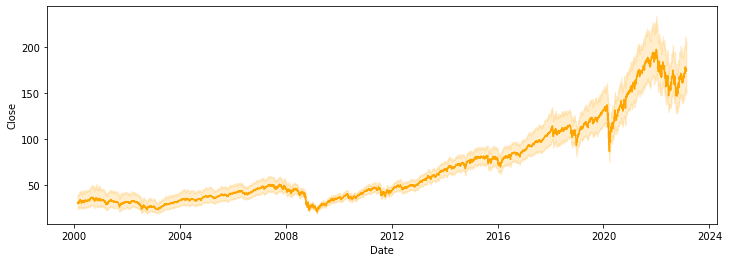

In [32]:
plt.subplots(figsize=(12, 4))
sns.lineplot(data=df_fusion, x=df_fusion['Date'], y='Close',color='orange')
plt.show()

## Grafico los sectores pertenecientes al sp500 por su máximo en los ultimos 10 años

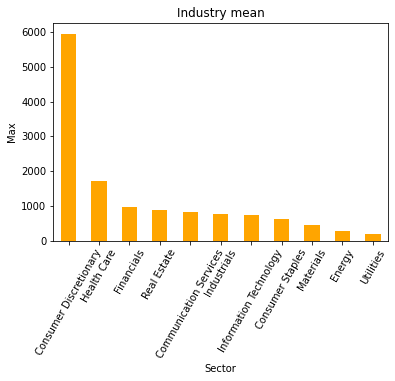

In [33]:
# Hago un filtro de los 10 ultimos años
ten_years_ago = (df_fusion['Date'].max() - dt.timedelta(days=365*10)).strftime('%Y-%m-%d')

# Filtro los datos para incluir solo los datos de los últimos 10 años
df_fusion_last_10_years = df_fusion[df_fusion['Date'] >= ten_years_ago]

# Agrupo los datos por sector y calculo el valor máximo de cierre para cada sector
sectors = df_fusion_last_10_years.groupby('GICS_Sector')
sectors_max = sectors['Close'].max()
sectors_max_orderby = sectors_max.sort_values(ascending=False)

# Creo el gráfico de barras que muestre el valor máximo de cierre para cada sector
ax = sectors_max_orderby.plot(kind='bar', color='orange')
plt.xticks(rotation=60)
ax.set_title('Industry mean')
ax.set_xlabel('Sector')
ax.set_ylabel('Max')
plt.show()


In [34]:
# Calculo la desviación estándar de los precios de cierre para cada empresa
Desv_std_empresa = df_fusion.groupby('Symbol')['Close'].std()

# Obtengo las 5 empresas más estables
empresas_estables = Desv_std_empresa.nsmallest(5).index.tolist()

# Filtro el DataFrame original para quedarse solo con los datos de las 5 compañías más estables
df_stable = df_fusion[df_fusion['Symbol'].isin(empresas_estables)]

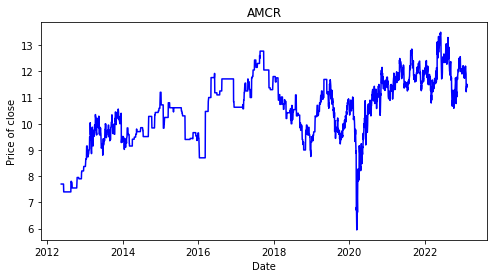

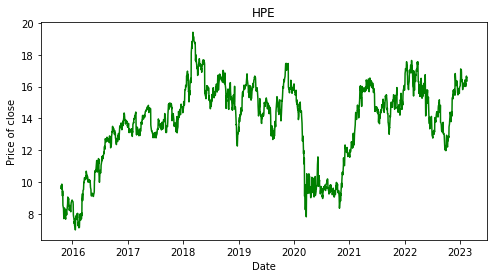

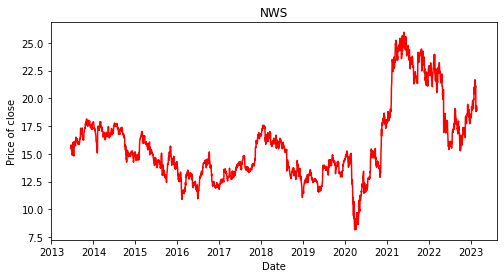

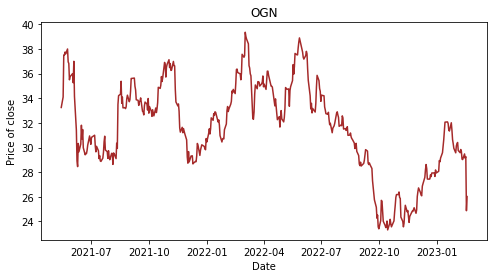

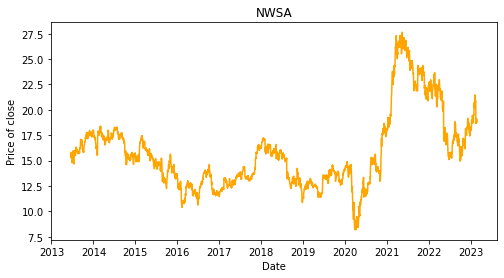

In [35]:
# Creo una gráfica para cada empresa que muestre la evolución de los precios de cierre
colores = ['blue', 'green', 'red', 'brown', 'orange'] # Lista de colores para cada empresa

for i, empresa in enumerate(empresas_estables):
    # Seleccionar solo los datos para la compañía actual
    df_empresas = df_stable[df_stable['Symbol'] == empresa]
    
    # Crear una nueva figura y un nuevo eje para la compañía actual
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Graficar los precios de cierre para la compañía actual
    ax.plot(df_empresas['Date'], df_empresas['Close'], color=colores[i])
    
    # Configurar las etiquetas del eje x e y y el título de la gráfica
    ax.set_xlabel('Date')
    ax.set_ylabel('Price of close')
    ax.set_title(empresa)
    
    # Mostrar la gráfica
    plt.show()


## Filtro 10 empresas con mayor retorno total

In [36]:
retorno = (df_fusion.groupby('Symbol')['Close'].last() - df_fusion.groupby('Symbol')['Close'].first()) / df_fusion.groupby('Symbol')['Close'].first()

In [37]:
top_10_retorno = retorno.nlargest(10)

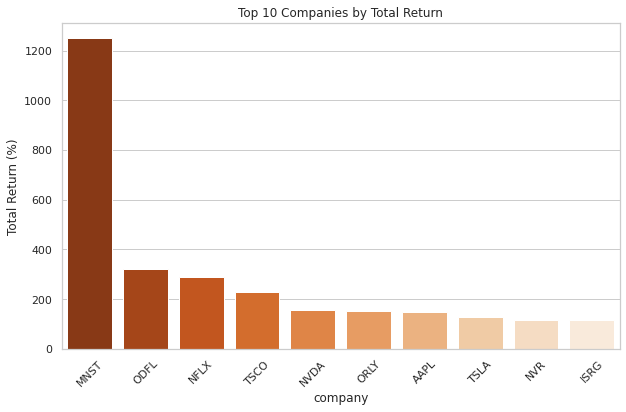

In [38]:
# Crear un gráfico de barras horizontales con Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_retorno.index, y=top_10_retorno.values, palette='Oranges_r')
plt.xticks(rotation=45)
plt.title('Top 10 Companies by Total Return')
plt.xlabel('company')
plt.ylabel('Total Return (%)')
plt.show()


## Genero un dataset para filtrar todos los sectores

In [39]:
sector_groups = df_fusion.groupby('GICS_Sector')

In [40]:

# Agrupar el DataFrame por compañía y calcular la capitalización de mercado para cada compañía
market_cap = (df_fusion.groupby('Symbol')['Close'].last() * df_fusion.groupby('Symbol')['Volume'].last()).sort_values(ascending=False)

# Seleccionar las diez primeras compañías con la mayor capitalización de mercado
top_10_market_cap = market_cap.nlargest(10)


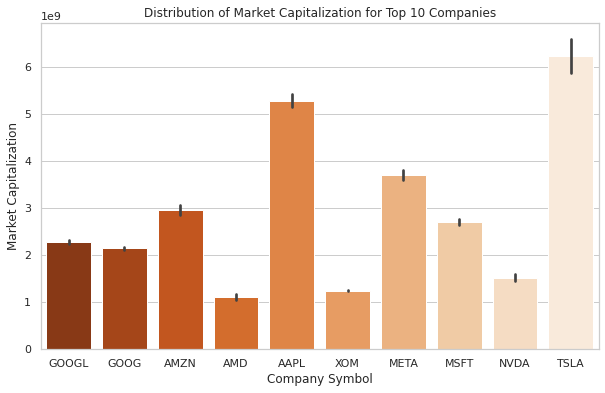

In [41]:
# Crear un gráfico
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=df_fusion[df_fusion['Symbol'].isin(top_10_market_cap.index)]['Symbol'], y=(df_fusion['Close'] * df_fusion['Volume']), palette='Oranges_r')
plt.title('Distribution of Market Capitalization for Top 10 Companies')
plt.xlabel('Company Symbol')
plt.ylabel('Market Capitalization')
plt.show()

In [42]:
df_fusion.sample(5)

,Date,Open,High,Low,Close,Adj_Close,Volume,Symbol,Security,GICS_Sector,GICS_Sub-Industry,Headquarters_Location,Date_added,CIK,Founded,Day,Year
2236779,2016-09-20,46.250000,46.250000,44.490002,44.500000,44.500000,5297700,TMUS,T-Mobile US,Communication Services,Wireless Telecommunication Services,"Bellevue, Washington",2019-07-15,1283699,1994,Martes,2016
1727677,2021-04-20,79.660004,80.959999,79.629997,80.529999,77.233101,7192100,NEE,NextEra Energy,Utilities,Multi-Utilities,"Juno Beach, Florida",1976-06-30,753308,1984 (1925),Martes,2021
1850460,2008-10-17,41.389999,43.630001,39.900002,41.540001,31.818794,2950400,PH,Parker Hannifin,Industrials,Industrial Machinery,"Cleveland, Ohio",1985-11-30,76334,1917,Viernes,2008
689999,2006-10-11,33.630001,34.380001,33.500000,34.349998,25.059385,2603700,CCI,Crown Castle,Real Estate,Specialized REITs,"Houston, Texas",2012-03-14,1051470,1994,Miercoles,2006
2384149,2007-04-18,71.150002,71.580002,71.089996,71.400002,44.381596,2788500,UPS,United Parcel Service,Industrials,Air Freight & Logistics,"Sandy Springs, Georgia",2002-07-22,1090727,1907,Miercoles,2007


In [43]:
# Agrupar los datos por sector y calcular la media de los precios de cierre
precios_promedio_por_sector = df_fusion.groupby('GICS_Sector')['Close'].mean()

# Ordenar los resultados en orden descendente
precios_promedio_por_sector = precios_promedio_por_sector.sort_values(ascending=False)

# Imprimir el resultado
print(precios_promedio_por_sector)


GICS_Sector
Consumer Discretionary    119.218917
Health Care                84.055357
Financials                 75.561961
Real Estate                72.730445
Industrials                71.006474
Information Technology     66.302450
Materials                  60.175817
Consumer Staples           55.884591
Communication Services     50.025359
Energy                     49.310367
Utilities                  42.581493
Name: Close, dtype: float64


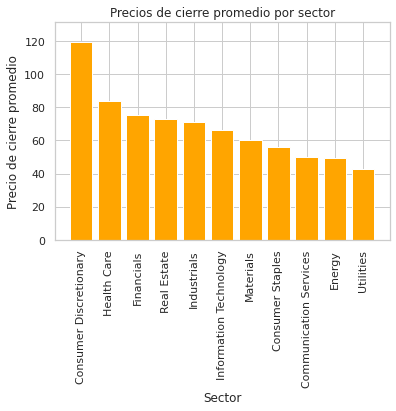

In [44]:


# Agrupar los datos por sector y calcular la media de los precios de cierre
precios_promedio_por_sector = df_fusion.groupby('GICS_Sector')['Close'].mean()

# Ordenar los resultados en orden descendente
precios_promedio_por_sector = precios_promedio_por_sector.sort_values(ascending=False)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear un gráfico de barras de los precios promedio por sector
ax.bar(precios_promedio_por_sector.index, precios_promedio_por_sector,color='orange')

# Ajustar los límites del eje y
ax.set_ylim([0, max(precios_promedio_por_sector)*1.1])

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Agregar etiquetas y título al gráfico
ax.set_xlabel('Sector')
ax.set_ylabel('Precio de cierre promedio')
ax.set_title('Precios de cierre promedio por sector')

# Mostrar el gráfico
plt.show()


In [45]:
df_fusion['daily_performance'] = df_fusion['Close'].pct_change()

In [46]:
df_fusion.head(5)

,Date,Open,High,Low,Close,Adj_Close,Volume,Symbol,Security,GICS_Sector,GICS_Sub-Industry,Headquarters_Location,Date_added,CIK,Founded,Day,Year,daily_performance
0,2000-02-22,43.87500,45.21875,43.25000,45.06250,24.376024,2884600,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Martes,2000,NaN
1,2000-02-23,45.68750,46.96875,45.40625,46.15625,25.129389,4460800,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Miercoles,2000,0.024272
2,2000-02-24,45.93750,46.06250,44.78125,45.50000,24.772102,3800200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Jueves,2000,-0.014218
3,2000-02-25,44.06250,44.65625,42.59375,42.87500,23.342945,3627200,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Viernes,2000,-0.057692
4,2000-02-28,43.46875,44.43750,42.50000,43.21875,23.530096,3076600,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,Lunes,2000,0.008017


<ipython-input-47-2fcca45a409d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sector['daily_performance'] = df_sector['Close'].pct_change()


<AxesSubplot:title={'center':'Performance diaria para el sector Consumer Discretionary'}, xlabel='Date'>

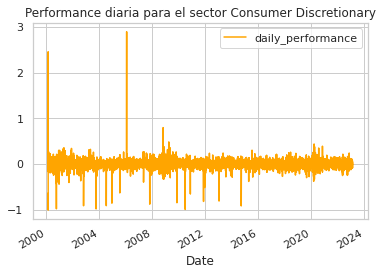

In [47]:
# Filtro df_fusion para incluir solo el sector "Consumer Discretionary"
df_sector = df_fusion[df_fusion['GICS_Sector'] == 'Consumer Discretionary']

# Calculo la performance diaria para este sector
df_sector['daily_performance'] = df_sector['Close'].pct_change()

# Grafico la performance diaria 
df_sector.plot(x='Date', y='daily_performance', kind='line', color='orange', title='Performance diaria para el sector Consumer Discretionary')


<ipython-input-48-816939a3d6a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sector['daily_performance'] = df_sector['Close'].pct_change()


<AxesSubplot:title={'center':'Performance diaria para el sector Consumer Discretionary'}, xlabel='Date'>

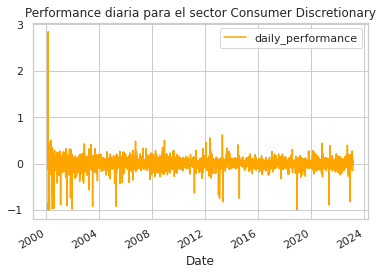

In [48]:
# Filtro df_fusion para incluir solo el sector "Consumer Discretionary"
df_sector = df_fusion[df_fusion['GICS_Sector'] == 'Health Care']

# Calculo la performance diaria para este sector
df_sector['daily_performance'] = df_sector['Close'].pct_change()

# Grafico la performance diaria 
df_sector.plot(x='Date', y='daily_performance', kind='line', color='orange', title='Performance diaria para el sector Consumer Discretionary')


In [49]:
df_fusion.to_parquet('sp500_acciones.parquet', index=False)